<a href="https://colab.research.google.com/github/akhila1107/64060_schinta7/blob/main/schinta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install tensorflow

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
print(train_data,train_data.shape)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

In [4]:
train_labels[0]

1

In [5]:
len(train_labels)

25000

In [6]:
test_labels[0]

0

In [7]:
max([max(sequence_647) for sequence_647 in test_data])

9999

In [9]:
word_index_647 = imdb.get_word_index()
reverse_word_index_647 = dict(
    [(value, key) for (key, value) in word_index_647.items()])
decoded_review = " ".join(
    [reverse_word_index_647.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


In [11]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

Data Vectorization

In [12]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [13]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [14]:
x_test[0]

array([0., 1., 1., ..., 0., 0., 0.])

Label Vectorization

In [16]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [18]:
from tensorflow import keras
from tensorflow.keras import layers

model647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [19]:
model647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

Validating the approach

In [20]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [22]:
## model planned to train with 20 epoch with batch size of 256
history = model647.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 83ms/step - loss: 0.5471 - accuracy: 0.7733 - val_loss: 0.4246 - val_accuracy: 0.8584
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3494 - accuracy: 0.8910 - val_loss: 0.3531 - val_accuracy: 0.8580
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2616 - accuracy: 0.9141 - val_loss: 0.3019 - val_accuracy: 0.8837
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2090 - accuracy: 0.9315 - val_loss: 0.2797 - val_accuracy: 0.8886
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1766 - accuracy: 0.9403 - val_loss: 0.2758 - val_accuracy: 0.8889
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1485 - accuracy: 0.9536 - val_loss: 0.2940 - val_accuracy: 0.8839
Epoch 7/20
30/30 [==============================] - 2s 52ms/step - loss: 0.1270 - accuracy: 0.9611 - val_loss: 0.2930 - val_accuracy: 0.8871
Epoch 8/20
30

In [24]:
history_dict647 = history.history
history_dict647.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

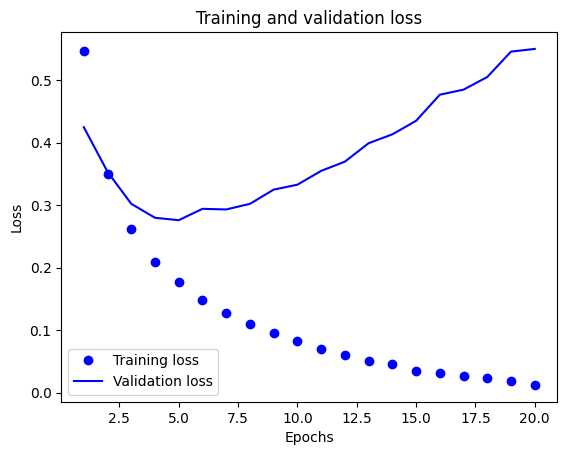

In [25]:
#Plotting the training loss vs validation loss
import matplotlib.pyplot as plot647
history_dict647 = history.history
loss_values = history_dict647["loss"]
val_loss_values = history_dict647["val_loss"]
epochs = range(1, len(loss_values) + 1)
plot647.plot(epochs, loss_values, "bo", label="Training loss")
plot647.plot(epochs, val_loss_values, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()

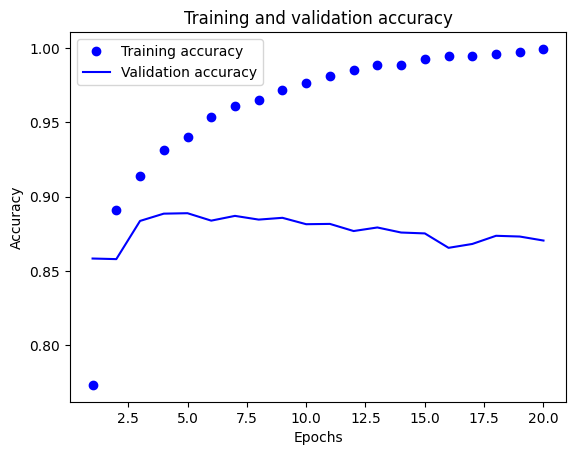

In [26]:
#Plotting training accuracy vs validatition accuracy
plot647.clf()
acc = history_dict647["accuracy"]
val_acc = history_dict647["val_accuracy"]
plot647.plot(epochs, acc, "bo", label="Training accuracy")
plot647.plot(epochs, val_acc, "b", label="Validation accuracy")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [27]:
model647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model647.fit(x_train, y_train, epochs=4, batch_size=512)
results = model647.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 35ms/step - loss: 0.4734 - accuracy: 0.8133
Epoch 2/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2719 - accuracy: 0.9032
Epoch 3/4
49/49 [==============================] - 2s 31ms/step - loss: 0.2133 - accuracy: 0.9212
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2978 - accuracy: 0.8813


In [28]:
results

[0.29775330424308777, 0.8813199996948242]

In [30]:
model647.predict(x_test)

782/782 [==============================] - 3s 4ms/step


array([[0.22551861],
       [0.99997437],
       [0.91426724],
       ...,
       [0.15570965],
       [0.09542248],
       [0.7399922 ]], dtype=float32)

In [32]:
model_647_layer = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_647_layer.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

x_val647 = x_train[:10000]
partial_x_train = x_train[10000:]

y_val647 = y_train[:10000]
partial_y_train = y_train[10000:]


history_layer647 = model_647_layer.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val647, y_val647))

Epoch 1/20
30/30 [==============================] - 3s 75ms/step - loss: 0.5177 - accuracy: 0.7855 - val_loss: 0.4122 - val_accuracy: 0.8575
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3436 - accuracy: 0.8923 - val_loss: 0.3346 - val_accuracy: 0.8815
Epoch 3/20
30/30 [==============================] - 1s 49ms/step - loss: 0.2714 - accuracy: 0.9148 - val_loss: 0.3028 - val_accuracy: 0.8863
Epoch 4/20
30/30 [==============================] - 2s 63ms/step - loss: 0.2306 - accuracy: 0.9257 - val_loss: 0.2843 - val_accuracy: 0.8879
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2000 - accuracy: 0.9363 - val_loss: 0.2828 - val_accuracy: 0.8873
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1778 - accuracy: 0.9437 - val_loss: 0.2844 - val_accuracy: 0.8850
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1614 - accuracy: 0.9497 - val_loss: 0.2980 - val_accuracy: 0.8802
Epoch 8/20
30

In [34]:
history_dict647 = history_layer647.history
history_dict647.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

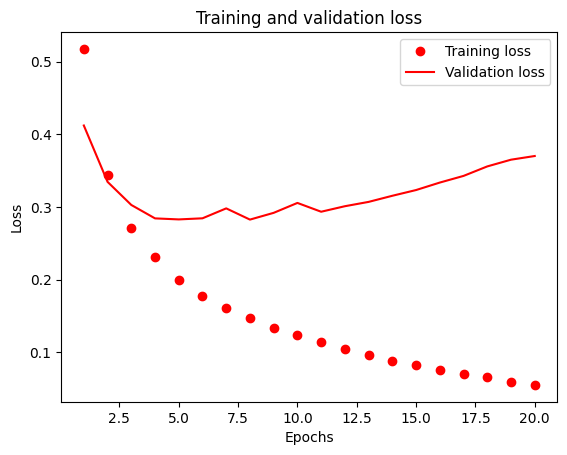

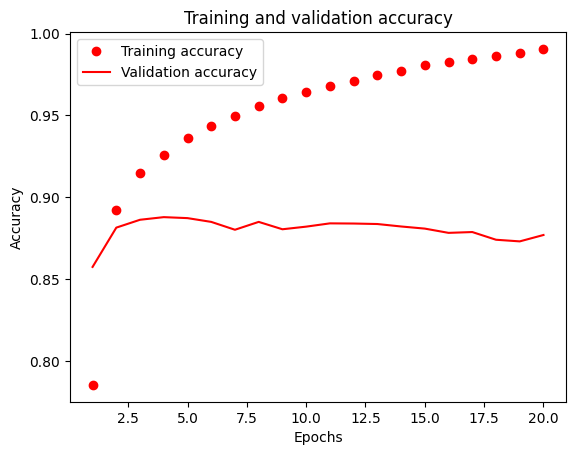

In [38]:
import matplotlib.pyplot as plot647
history_dict647 = history_layer647.history
loss_value647 = history_dict647["loss"]
val_loss_value647 = history_dict647["val_loss"]
epochs647 = range(1, len(loss_value647) + 1)

#Plotting graph of Training and Validation loss
plot647.plot(epochs647, loss_value647, "ro", label="Training loss")
plot647.plot(epochs647, val_loss_value647, "r", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()

#Plotting graph of Training and Validation Accuracy
plot647.clf()
accuracy647 = history_dict647["accuracy"]
val_accuracy1 = history_dict647["val_accuracy"]
plot647.plot(epochs647, accuracy647, "ro", label="Training accuracy")
plot647.plot(epochs647, val_accuracy1, "r", label="Validation accuracy")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()